#Introduction 

We are trying to predict the trading prices of US corporate bonds using machine learning model from real world dataset from the [Benchmark Bond Trade](https://www.kaggle.com/c/benchmark-bond-trade-price-challenge) competition on Kaggle:

>The Benchmark Bond Trade Price is a to predict the next price that a US corporate bond might trade at. Given information on the bond including current coupon, time to maturity and a reference price computed by Benchmark Solutions.  Details of the previous 10 trades are also there.  
>
>
>View and downdownload the data here: https://www.kaggle.com/c/benchmark-bond-trade-price-challenge/data


## Downloading the Data

We can download the dataset from Kaggle directly within the Jupyter notebook using the `opendatasets` library. Make sure to [accept the competition rules](https://www.kaggle.com/c/benchmark-bond-trade-price-challenge/rules) before executing the following cell.



In [4]:
import os
import jovian
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import opendatasets as od
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
od.download('https://www.kaggle.com/c/benchmark-bond-trade-price-challenge/data')

Skipping, found downloaded files in "./benchmark-bond-trade-price-challenge" (use force=True to force download)


You'll be asked to provide your Kaggle credentials to download the data. Follow these instructions: http://bit.ly/kaggle-creds

In [6]:
os.listdir('benchmark-bond-trade-price-challenge')

['train.mat',
 'train.csv',
 'test.csv',
 'test.mat',
 'test.zip',
 'random_forest_benchmark.r',
 'test.7z',
 'train.7z',
 'train.zip',
 'old_data.zip',
 'random_forest_sample_submission.csv']

Let's load the data into Pandas dataframes.

In [7]:
test_df = pd.read_csv('benchmark-bond-trade-price-challenge/test.csv')
train_df = pd.read_csv('benchmark-bond-trade-price-challenge/train.csv')
submission_df = pd.read_csv('benchmark-bond-trade-price-challenge/random_forest_sample_submission.csv')

In [8]:
train_df

id  bond_id  trade_price     weight  current_coupon  \
0            1        1      128.596  11.316404            5.95   
1            2        1      126.673   8.763446            5.95   
2            3        1      126.880   6.499730            5.95   
3            4        1      126.362   0.865854            5.95   
4            5        1      124.918  11.938543            5.95   
...        ...      ...          ...        ...             ...   
762673  762674   915157      101.334   0.554384            5.75   
762674  762675   915157      101.303   0.261769            5.75   
762675  762676   915157      101.503   0.321389            5.75   
762676  762677   915157      101.479   0.351248            5.75   
762677  762678   915157      101.440   0.153716            5.75   

        time_to_maturity  is_callable  reporting_delay  trade_size  \
0              26.031126            0            1.731      120000   
1              26.016697            0           30.518       85000   
2              26.008760            0            4.424     4200000   
3              26.008619            0           43.059     5000001   
4              25.981840            0            6.332       10000   
...                  ...          ...              ...         ...   
762673         10.005765            0            2.363       50000   
762674         10.005752            0          154.395      500000   
762675         10.005733            0           48.938     3700000   
762676         10.005710            0            9.511     2000000   
762677         10.005705            0            2.325     3700000   

        trade_type  curve_based_price  received_time_diff_last1  \
0                2         127.561201                    758762   
1                4         126.323528                    455028   
2                3         126.761433                    250310   
3                2         127.025765                      4441   
4                2         125.736081                    844484   
...            ...                ...                       ...   
762673           3         101.480892                      1820   
762674           2         101.487747                       405   
762675           4         101.446401                       611   
762676           4         101.429376                       730   
762677           4         101.355311                       139   

        trade_price_last1  trade_size_last1  trade_type_last1  \
0                 129.089            200000                 2   
1                 128.596            120000                 2   
2                 126.673             85000                 4   
3                 126.880           4200000                 3   
4                 126.362           5000001                 2   
...                   ...               ...               ...   
762673            101.257            165000                 3   
762674            101.334             50000                 3   
762675            101.303            500000                 2   
762676            101.503           3700000                 4   
762677            101.479           2000000                 4   

        curve_based_price_last1  received_time_diff_last2  trade_price_last2  \
0                    129.435587                       NaN                NaN   
1                    127.561201                 1213791.0            129.089   
2                    126.323528                  705339.0            128.596   
3                    126.761433                  254752.0            126.673   
4                    127.025765                  848925.0            126.880   
...                         ...                       ...                ...   
762673               101.366967                    2397.0            102.259   
762674               101.480892                    2225.0            101.257   
762675               101.487747                    1016.0   

In [9]:
test_df

id     weight  current_coupon  time_to_maturity  is_callable  \
0      762679   0.733639         1.30278          1.090694            0   
1      762680   0.403570         8.50000          7.472191            0   
2      762681   0.416940         8.62500          8.378550            1   
3      762682   0.012991         7.00000          1.715990            0   
4      762683  14.730664         5.62500          1.241897            0   
...       ...        ...             ...               ...          ...   
61141  823820   0.131848         5.62500          7.822351            0   
61142  823821   0.012991         4.95000          3.721057            0   
61143  823822   3.942687         5.95000         17.049668            0   
61144  823823   0.022502        11.25000          4.214376            1   
61145  823824   0.180949         5.37500          8.326506            0   

       reporting_delay  trade_size  trade_type  curve_based_price  \
0               68.135     2250000           2          98.521799   
1                2.421        3000           2         119.292424   
2               25.469     1000000           4         103.973124   
3               12.188       25000           4         106.680891   
4               84.129     1000000           4         103.369002   
...                ...         ...         ...                ...   
61141            3.054       15000           3          87.727603   
61142            7.063       40000           4          99.563152   
61143            2.370        7000           2         126.686954   
61144            2.847       10000           4          85.449365   
61145            8.371       10000           4          96.362306   

       received_time_diff_last1  trade_price_last1  trade_size_last1  \
0                          3188          98.200000           5000001   
1                           964         116.417666              3000   
2                          1029         104.750000           1000000   
3                             0         106.693000             15000   
4                       1285682         101.511000              3000   
...                         ...                ...               ...   
61141                       102          89.326000             50000   
61142                         0         101.352000             40000   
61143                     92102         122.267000             30000   
61144                         2          85.730000             10000   
61145                       193          97.219000            100000   

       trade_type_last1  curve_based_price_last1  received_time_diff_last2  \
0                     3                98.501951                   98934.0   
1                     3               119.380981                     964.0   
2                     4               103.420577                    8634.0   
3                     3               106.680891                       0.0   
4                     2               103.509270                 1285683.0   
...                 ...                      ...                       ...   
61141                 3                87.727603                     255.0   
61142                 3                99.563152                       6.0   
61143                 4               125.662046                   92121.0   
61144                 4                85.449365                     220.0   
61145                 3                96.362306                     625.0   

       trade_price_last2  trade_size_last2  trade_type_last2  \
0                98.0244          145000.0               4.0   
1               116.1510            3000.0               4.0   
2               104.5000         1000001.0               2.0   
3               106.6930           10000.0               3.0   
4               102.3860            3000.0               4.0   
...                  ...               ...               ...   
61141            89.1730       

In [10]:
submission_df

id  trade_price
0      762679    98.064530
1      762680   116.611906
2      762681   104.496657
3      762682   106.858986
4      762683   102.054346
...       ...          ...
61141  823820    89.290315
61142  823821   100.356799
61143  823822   123.218163
61144  823823    85.358722
61145  823824    96.918183

[61146 rows x 2 columns]

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762678 entries, 0 to 762677
Data columns (total 61 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         762678 non-null  int64  
 1   bond_id                    762678 non-null  int64  
 2   trade_price                762678 non-null  float64
 3   weight                     762678 non-null  float64
 4   current_coupon             762678 non-null  float64
 5   time_to_maturity           762678 non-null  float64
 6   is_callable                762678 non-null  int64  
 7   reporting_delay            762678 non-null  float64
 8   trade_size                 762678 non-null  int64  
 9   trade_type                 762678 non-null  int64  
 10  curve_based_price          762678 non-null  float64
 11  received_time_diff_last1   762678 non-null  int64  
 12  trade_price_last1          762678 non-null  float64
 13  trade_size_last1           76

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61146 entries, 0 to 61145
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         61146 non-null  int64  
 1   weight                     61146 non-null  float64
 2   current_coupon             61146 non-null  float64
 3   time_to_maturity           61146 non-null  float64
 4   is_callable                61146 non-null  int64  
 5   reporting_delay            61146 non-null  float64
 6   trade_size                 61146 non-null  int64  
 7   trade_type                 61146 non-null  int64  
 8   curve_based_price          61146 non-null  float64
 9   received_time_diff_last1   61146 non-null  int64  
 10  trade_price_last1          61146 non-null  float64
 11  trade_size_last1           61146 non-null  int64  
 12  trade_type_last1           61146 non-null  int64  
 13  curve_based_price_last1    61142 non-null  flo

In [13]:
train_df.describe()

id        bond_id    trade_price         weight  \
count  762678.000000  762678.000000  762678.000000  762678.000000   
mean   381339.500000  203276.404997     103.440546       0.983026   
std    220166.318641  306709.374413       9.824289       2.164972   
min         1.000000       1.000000       1.009000       0.012991   
25%    190670.250000    7615.000000      99.433000       0.036745   
50%    381339.500000   20953.000000     102.300000       0.220471   
75%    572008.750000  348272.000000     107.110000       0.736710   
max    762678.000000  915157.000000     168.148000      42.896223   

       current_coupon  time_to_maturity    is_callable  reporting_delay  \
count   762678.000000     762678.000000  762678.000000     7.626780e+05   
mean         5.588142          6.564305       0.111405     2.823761e+04   
std          1.724374          6.267664       0.314633     1.064998e+06   
min          0.000000          0.082471       0.000000    -5.858100e+01   
25%          4.750000          2.493513       0.000000     2.491000e+00   
50%          5.625000          4.775924       0.000000     9.438000e+00   
75%          6.500000          8.258087       0.000000     3.496775e+01   
max         13.500000         84.159498       1.000000     9.987914e+07   

         trade_size     trade_type  curve_based_price  \
count  7.626780e+05  762678.000000      762678.000000   
mean   2.672078e+05       3.231778         103.219652   
std    7.725859e+05       0.764844           9.932693   
min    1.000000e+00       2.000000           1.746127   
25%    1.000000e+04       3.000000          98.899486   
50%    2.500000e+04       3.000000         102.121523   
75%    1.000000e+05       4.000000         106.988161   
max    5.000001e+06       4.000000         172.956162   

       received_time_diff_last1  trade_price_last1  trade_size_last1  \
count              7.626780e+05      762678.000000      7.626780e+05   
mean               3.349569e+04         103.436291      2.672060e+05   
std                1.811744e+05           9.825868      7.725169e+05   
min                0.000000e+00           1.009000      1.000000e+00   
25%                7.000000e+00          99.426000      1.000000e+04   
50%                2.870000e+02         102.299000      2.500000e+04   
75%                3.214750e+03         107.103000      1.000000e+05   
max                1.090253e+07         168.148000      5.000001e+06   

       trade_type_last1  curve_based_price_last1  received_time_diff_last2  \
count     762678.000000            762639.000000              7.606780e+05   
mean           3.231336               103.217017              6.603282e+04   
std            0.765303                 9.934846              2.588630e+05   
min            2.000000                 1.746127              0.000000e+00   
25%            3.000000                98.896434              3.460000e+02   
50%            3.000000               102.120478              2.167000e+03   
75%            4.000000               106.986749              1.468600e+04   
max            4.000000               172.956162              1.080817e+07   

       trade_price_last2  trade_size_last2  trade_type_last2  \
count      760678.000000      7.606780e+05     760678.000000   
mean          103.425785      2.668489e+05          3.231933   
std             9.819030      7.719213e+05          0.765165   
min             1.009000      1.000000e+00          2.000000   
25%            99.416466      1.000000e+04          3.000000   
50%           102.290000      2.500000e+04          3.000000   
75%           107.091000      1.000000e+05          4.000000   
max           168.148000      5.000001e+06          4.000000   

       curve_based_price_last2  received_time_diff_last3  trade_price_last3  \
count            760602.000000              7.587080e+05      758708.000000   
mean                103.206366              9.681776e+04         103.415557   
std                   9.927876          

In [14]:
test_df.describe()

id        weight  current_coupon  time_to_maturity  \
count   61146.000000  61146.000000    61146.000000      61146.000000   
mean   793251.500000      1.012902        5.642645          6.798083   
std     17651.474117      2.198499        1.865132          6.191860   
min    762679.000000      0.012991        0.000000          0.091015   
25%    777965.250000      0.036745        4.700000          3.005876   
50%    793251.500000      0.232760        5.550000          5.236462   
75%    808537.750000      0.766712        6.625000          8.367985   
max    823824.000000     41.503570       13.500000         85.370731   

        is_callable  reporting_delay    trade_size    trade_type  \
count  61146.000000     6.114600e+04  6.114600e+04  61146.000000   
mean       0.136902     2.728416e+04  2.911970e+05      3.215075   
std        0.343747     1.003978e+06  8.082724e+05      0.772668   
min        0.000000    -4.550800e+01  1.000000e+03      2.000000   
25%        0.000000     2.469000e+00  1.000000e+04      3.000000   
50%        0.000000     9.733000e+00  2.500000e+04      3.000000   
75%        0.000000     3.694750e+01  1.100000e+05      4.000000   
max        1.000000     7.396095e+07  5.000001e+06      4.000000   

       curve_based_price  received_time_diff_last1  trade_price_last1  \
count       61146.000000              6.114600e+04       61146.000000   
mean          103.291058              3.471537e+04         103.498713   
std             9.566156              1.847424e+05           9.441837   
min            36.301502              0.000000e+00          35.500000   
25%            98.740655              7.000000e+00          99.250000   
50%           102.383006              3.200000e+02         102.549000   
75%           107.326145              3.482000e+03         107.500000   
max           159.714789              1.020611e+07         161.359000   

       trade_size_last1  trade_type_last1  curve_based_price_last1  \
count      6.114600e+04      61146.000000             61142.000000   
mean       2.915059e+05          3.213064               103.288947   
std        8.079139e+05          0.772241                 9.568555   
min        1.000000e+03          2.000000                36.374036   
25%        1.000000e+04          3.000000                98.737226   
50%        2.500000e+04          3.000000               102.375100   
75%        1.120000e+05          4.000000               107.335304   
max        5.000001e+06          4.000000               159.988857   

       received_time_diff_last2  trade_price_last2  trade_size_last2  \
count              6.096800e+04       60968.000000      6.096800e+04   
mean               6.895044e+04         103.478744      2.910939e+05   
std                2.663388e+05           9.431611      8.074367e+05   
min                0.000000e+00          35.322000      1.000000e+03   
25%                3.887500e+02          99.235000      1.000000e+04   
50%                2.421000e+03         102.525000      2.500000e+04   
75%                1.833775e+04         107.460175      1.100000e+05   
max                1.026673e+07         161.359000      5.000001e+06   

       trade_type_last2  curve_based_price_last2  received_time_diff_last3  \
count      60968.000000             60960.000000              6.079200e+04   
mean           3.216474               103.274826              1.009676e+05   
std            0.772782                 9.564431              3.312941e+05   
min            2.000000                36.374036              0.000000e+00   
25%            3.000000                98.724825              1.142000e+03   
50%            3.000000               102.364352              5.053000e+03   
75%            4.000000               107.324323              7.237250e+04   
max            4.000000               159.523268              1.167010e+07   

       trade_price_last3  trade_size_last3  trade_type_last3  \
count       60792.000000      6.079200e+04      607

## Exploratory Data Analysis & Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between Trade Price, Current Coupon, Time To Maturity, Trade Size and other Curve Based Price.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

**Trade** **Price**




In [15]:
sample_df = train_df.sample(70000)
fig = px.histogram(sample_df, 
                   x='trade_price', 
                   marginal='box',
                   title='Distribution of Trade Prices')
fig.update_layout(bargap=0.2)
fig.show()


The above graph show that distribution of trade prices seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 102, with a few outliers around.

**Current** **Coupon**

In [16]:
fig = px.histogram(sample_df, 
                   x='current_coupon', 
                   marginal='box', 
                   color='is_callable', 
                   color_discrete_sequence=['red', 'black'], 
                   title='Distribution of Coupons')
fig.update_layout(bargap=0.2)
fig.show()

Here additionally we see that the coupons follow Gaussian appropriation however with fatter tails. The middle of coupon of callable bond is essentially higher than not callable bond true to form.

**Time** **To** **Maturity**

In [17]:
fig = px.histogram(sample_df, 
                   x='time_to_maturity',
                   marginal='box', 
                   color='is_callable', 
                   color_discrete_sequence=['red', 'black'], 
                   title='Distribution of Time To Maturity')
fig.update_layout(bargap=0.2)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Moreover we see that the time to maturity of the Bonds are typically under 10 years henceforth we have information which is correct slanted as far as an ideal opportunity to maturity.Hence the prediction of trade prices of bonds with maturiy more prominent than 10 years will be less precise.

**Trade** **size**

In [18]:
fig = px.histogram(sample_df, 
                   x='trade_size', 
                   marginal='box', 
                   color='is_callable', 
                   color_discrete_sequence=['red', 'black'], 
                   title='Distribution of Trade Size')
fig.update_layout(bargap=0.2)
fig.show()

The typical trade size goes from 0-80k and there are numerous outliers where the trade size goes from 1-5M.Howeever this is just a portrayal of the example of 70k sections and not the whole dataset 

**Curve** **Based** **Price**


In [19]:
fig = px.histogram(sample_df, 
                   x='curve_based_price', 
                   marginal='box', 
                   color='is_callable', 
                   color_discrete_sequence=['red', 'black'], 
                   title='Distribution of Curve Based Price')
fig.update_layout(bargap=0.2)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

The curve based price the median price of callable bond is lower than the not callable bond.

## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.Also let's pick the rows and columns that we want to use and create validation dataset too.

In [20]:
train_df

id  bond_id  trade_price     weight  current_coupon  \
0            1        1      128.596  11.316404            5.95   
1            2        1      126.673   8.763446            5.95   
2            3        1      126.880   6.499730            5.95   
3            4        1      126.362   0.865854            5.95   
4            5        1      124.918  11.938543            5.95   
...        ...      ...          ...        ...             ...   
762673  762674   915157      101.334   0.554384            5.75   
762674  762675   915157      101.303   0.261769            5.75   
762675  762676   915157      101.503   0.321389            5.75   
762676  762677   915157      101.479   0.351248            5.75   
762677  762678   915157      101.440   0.153716            5.75   

        time_to_maturity  is_callable  reporting_delay  trade_size  \
0              26.031126            0            1.731      120000   
1              26.016697            0           30.518       85000   
2              26.008760            0            4.424     4200000   
3              26.008619            0           43.059     5000001   
4              25.981840            0            6.332       10000   
...                  ...          ...              ...         ...   
762673         10.005765            0            2.363       50000   
762674         10.005752            0          154.395      500000   
762675         10.005733            0           48.938     3700000   
762676         10.005710            0            9.511     2000000   
762677         10.005705            0            2.325     3700000   

        trade_type  curve_based_price  received_time_diff_last1  \
0                2         127.561201                    758762   
1                4         126.323528                    455028   
2                3         126.761433                    250310   
3                2         127.025765                      4441   
4                2         125.736081                    844484   
...            ...                ...                       ...   
762673           3         101.480892                      1820   
762674           2         101.487747                       405   
762675           4         101.446401                       611   
762676           4         101.429376                       730   
762677           4         101.355311                       139   

        trade_price_last1  trade_size_last1  trade_type_last1  \
0                 129.089            200000                 2   
1                 128.596            120000                 2   
2                 126.673             85000                 4   
3                 126.880           4200000                 3   
4                 126.362           5000001                 2   
...                   ...               ...               ...   
762673            101.257            165000                 3   
762674            101.334             50000                 3   
762675            101.303            500000                 2   
762676            101.503           3700000                 4   
762677            101.479           2000000                 4   

        curve_based_price_last1  received_time_diff_last2  trade_price_last2  \
0                    129.435587                       NaN                NaN   
1                    127.561201                 1213791.0            129.089   
2                    126.323528                  705339.0            128.596   
3                    126.761433                  254752.0            126.673   
4                    127.025765                  848925.0            126.880   
...                         ...                       ...                ...   
762673               101.366967                    2397.0            102.259   
762674               101.480892                    2225.0            101.257   
762675               101.487747                    1016.0   

In [21]:
X_train = train_df.iloc[:60000,:36].copy()

In [22]:
X_train

id  bond_id  trade_price     weight  current_coupon  \
0          1        1      128.596  11.316404           5.950   
1          2        1      126.673   8.763446           5.950   
2          3        1      126.880   6.499730           5.950   
3          4        1      126.362   0.865854           5.950   
4          5        1      124.918  11.938543           5.950   
...      ...      ...          ...        ...             ...   
59995  59996     3444      112.255   0.248879           4.625   
59996  59997     3444      113.258   3.550738           4.625   
59997  59998     3444      111.502   0.756406           4.625   
59998  59999     3444      113.103   0.869647           4.625   
59999  60000     3444      113.123   0.136255           4.625   

       time_to_maturity  is_callable  reporting_delay  trade_size  trade_type  \
0             26.031126            0            1.731      120000           2   
1             26.016697            0           30.518       85000           4   
2             26.008760            0            4.424     4200000           3   
3             26.008619            0           43.059     5000001           2   
4             25.981840            0            6.332       10000           2   
...                 ...          ...              ...         ...         ...   
59995          8.241869            0          637.309       17000           4   
59996          8.239500            0           20.047      200000           3   
59997          8.239393            0           12.268       15000           2   
59998          8.239251            0            1.452     3705000           2   
59999          8.239247            0            1.443     3705000           3   

       curve_based_price  received_time_diff_last1  trade_price_last1  \
0             127.561201                    758762           129.0890   
1             126.323528                    455028           128.5960   
2             126.761433                    250310           126.6730   
3             127.025765                      4441           126.8800   
4             125.736081                    844484           126.3620   
...                  ...                       ...                ...   
59995         112.486793                       366           112.7762   
59996         112.279619                     74700           112.2550   
59997         112.212177                      3389           113.2580   
59998         112.350143                      4480           111.5020   
59999         112.401559                       109           113.1030   

       trade_size_last1  trade_type_last1  curve_based_price_last1  \
0                200000                 2               129.435587   
1                120000                 2               127.561201   
2                 85000                 4               126.323528   
3               4200000                 3               126.761433   
4               5000001                 2               127.025765   
...                 ...               ...                      ...   
59995             17000                 4               112.553350   
59996             17000                 4               112.486793   
59997            200000                 3               112.279619   
59998             15000                 2               112.212177   
59999           3705000                 2               112.350143   

       received_time_diff_last2  trade_price_last2  trade_size_last2  \
0                           NaN                NaN               NaN   
1                     1213791.0           129.0890          200000.0   
2                      705339.0           128.5960          120000.0   
3                      254752.0           126.6730           85000.0   
4                      848925.0           126.8800         4200000.0   
...                         ...                ...               ...   
59995                     589.0   

In [23]:
test_df

id     weight  current_coupon  time_to_maturity  is_callable  \
0      762679   0.733639         1.30278          1.090694            0   
1      762680   0.403570         8.50000          7.472191            0   
2      762681   0.416940         8.62500          8.378550            1   
3      762682   0.012991         7.00000          1.715990            0   
4      762683  14.730664         5.62500          1.241897            0   
...       ...        ...             ...               ...          ...   
61141  823820   0.131848         5.62500          7.822351            0   
61142  823821   0.012991         4.95000          3.721057            0   
61143  823822   3.942687         5.95000         17.049668            0   
61144  823823   0.022502        11.25000          4.214376            1   
61145  823824   0.180949         5.37500          8.326506            0   

       reporting_delay  trade_size  trade_type  curve_based_price  \
0               68.135     2250000           2          98.521799   
1                2.421        3000           2         119.292424   
2               25.469     1000000           4         103.973124   
3               12.188       25000           4         106.680891   
4               84.129     1000000           4         103.369002   
...                ...         ...         ...                ...   
61141            3.054       15000           3          87.727603   
61142            7.063       40000           4          99.563152   
61143            2.370        7000           2         126.686954   
61144            2.847       10000           4          85.449365   
61145            8.371       10000           4          96.362306   

       received_time_diff_last1  trade_price_last1  trade_size_last1  \
0                          3188          98.200000           5000001   
1                           964         116.417666              3000   
2                          1029         104.750000           1000000   
3                             0         106.693000             15000   
4                       1285682         101.511000              3000   
...                         ...                ...               ...   
61141                       102          89.326000             50000   
61142                         0         101.352000             40000   
61143                     92102         122.267000             30000   
61144                         2          85.730000             10000   
61145                       193          97.219000            100000   

       trade_type_last1  curve_based_price_last1  received_time_diff_last2  \
0                     3                98.501951                   98934.0   
1                     3               119.380981                     964.0   
2                     4               103.420577                    8634.0   
3                     3               106.680891                       0.0   
4                     2               103.509270                 1285683.0   
...                 ...                      ...                       ...   
61141                 3                87.727603                     255.0   
61142                 3                99.563152                       6.0   
61143                 4               125.662046                   92121.0   
61144                 4                85.449365                     220.0   
61145                 3                96.362306                     625.0   

       trade_price_last2  trade_size_last2  trade_type_last2  \
0                98.0244          145000.0               4.0   
1               116.1510            3000.0               4.0   
2               104.5000         1000001.0               2.0   
3               106.6930           10000.0               3.0   
4               102.3860            3000.0               4.0   
...                  ...               ...               ...   
61141            89.1730       

In [24]:
X_test = test_df.iloc[:50000, :34].copy()
X_test

id     weight  current_coupon  time_to_maturity  is_callable  \
0      762679   0.733639         1.30278          1.090694            0   
1      762680   0.403570         8.50000          7.472191            0   
2      762681   0.416940         8.62500          8.378550            1   
3      762682   0.012991         7.00000          1.715990            0   
4      762683  14.730664         5.62500          1.241897            0   
...       ...        ...             ...               ...          ...   
49995  812674   0.156975         6.25000         24.211612            0   
49996  812675   0.115470         6.75000         25.830916            0   
49997  812676   0.067505         5.70000          9.490710            0   
49998  812677   0.108694         6.40000         10.650048            1   
49999  812678   0.536121         5.75000          6.011426            0   

       reporting_delay  trade_size  trade_type  curve_based_price  \
0               68.135     2250000           2          98.521799   
1                2.421        3000           2         119.292424   
2               25.469     1000000           4         103.973124   
3               12.188       25000           4         106.680891   
4               84.129     1000000           4         103.369002   
...                ...         ...         ...                ...   
49995           57.270       75000           3          77.479633   
49996            4.273       40000           4          94.020033   
49997            3.543      125000           2         101.041363   
49998            0.605        6000           4          73.286788   
49999            1.093        5000           3          91.391343   

       received_time_diff_last1  trade_price_last1  trade_size_last1  \
0                          3188          98.200000           5000001   
1                           964         116.417666              3000   
2                          1029         104.750000           1000000   
3                             0         106.693000             15000   
4                       1285682         101.511000              3000   
...                         ...                ...               ...   
49995                       145          79.000000              5000   
49996                        78          93.545000              7000   
49997                        26          99.734800             66000   
49998                        69          74.555000              8000   
49999                      1702          92.435003             30000   

       trade_type_last1  curve_based_price_last1  received_time_diff_last2  \
0                     3                98.501951                   98934.0   
1                     3               119.380981                     964.0   
2                     4               103.420577                    8634.0   
3                     3               106.680891                       0.0   
4                     2               103.509270                 1285683.0   
...                 ...                      ...                       ...   
49995                 4                77.479633                     193.0   
49996                 4                94.059340                      82.0   
49997                 2               101.041363                   20085.0   
49998                 3                73.286788                      69.0   
49999                 4                91.469161                    1703.0   

       trade_price_last2  trade_size_last2  trade_type_last2  \
0                98.0244          145000.0               4.0   
1               116.1510            3000.0               4.0   
2               104.5000         1000001.0               2.0   
3               106.6930           10000.0               3.0   
4               102.3860            3000.0               4.0   
...                  ...               ...               ...   
49995            79.2000       

In [25]:
X_val = train_df.iloc[60002:80002, :36].copy()
X_val

id  bond_id  trade_price    weight  current_coupon  \
60002  60003     3444   113.891000  0.876317           4.625   
60003  60004     3444   114.041000  0.798310           4.625   
60004  60005     3444   114.041000  0.293674           4.625   
60005  60006     3444   112.488000  0.992205           4.625   
60006  60007     3444   112.488000  0.012991           4.625   
...      ...      ...          ...       ...             ...   
79997  79998     4959   100.274000  0.157512           6.625   
79998  79999     4959   101.611000  0.520142           6.625   
79999  80000     4959   101.611000  0.072333           6.625   
80000  80001     4959   101.638524  0.433803           6.625   
80001  80002     4959   101.722000  0.780457           6.625   

       time_to_maturity  is_callable  reporting_delay  trade_size  trade_type  \
60002          8.231230            0            1.406     2000000           3   
60003          8.231110            0            5.568       10000           4   
60004          8.231094            0            2.127       10000           3   
60005          8.230909            0            1.502       35000           4   
60006          8.230909            0            1.605       35000           2   
...                 ...          ...              ...         ...         ...   
79997          0.285823            0           63.986      120000           2   
79998          0.285773            0            1.464       25000           4   
79999          0.285772            0           34.859       25000           3   
80000          0.285736            0           71.115       22000           4   
80001          0.285622            0          136.987      500000           3   

       curve_based_price  received_time_diff_last1  trade_price_last1  \
60002         112.878133                      4549         113.536000   
60003         113.067126                      3775         113.891000   
60004         113.066583                       510         114.041000   
60005         113.030966                      5832         114.041000   
60006         113.030966                         0         112.488000   
...                  ...                       ...                ...   
79997         101.488313                       146         101.474000   
79998         101.493343                      1602         100.274000   
79999         101.493343                        30         101.611000   
80000         101.491078                      1114         101.611000   
80001         101.492401                      3608         101.638524   

       trade_size_last1  trade_type_last1  curve_based_price_last1  \
60002            370000                 4               112.302316   
60003           2000000                 3               112.878133   
60004             10000                 4               113.067126   
60005             10000                 3               113.066583   
60006             35000                 4               113.030966   
...                 ...               ...                      ...   
79997            120000                 4               101.489501   
79998            120000                 2               101.488313   
79999             25000                 4               101.493343   
80000             25000                 3               101.493343   
80001             22000                 4               101.491078   

       received_time_diff_last2  trade_price_last2  trade_size_last2  \
60002                    4592.0            113.504          370000.0   
60003                    8325.0            113.536          370000.0   
60004                    4285.0            113.891         2000000.0   
60005                    6342.0            114.041           10000.0   
60006                    5832.0            114.041           10000.0   
...                         ...                ...               ...   
79997                    1600.0            101

###Identifying Input and Target Columns

Let's create a list of input columns, and also identify the target column.

In [26]:
X_train.columns

Index(['id', 'bond_id', 'trade_price', 'weight', 'current_coupon',
       'time_to_maturity', 'is_callable', 'reporting_delay', 'trade_size',
       'trade_type', 'curve_based_price', 'received_time_diff_last1',
       'trade_price_last1', 'trade_size_last1', 'trade_type_last1',
       'curve_based_price_last1', 'received_time_diff_last2',
       'trade_price_last2', 'trade_size_last2', 'trade_type_last2',
       'curve_based_price_last2', 'received_time_diff_last3',
       'trade_price_last3', 'trade_size_last3', 'trade_type_last3',
       'curve_based_price_last3', 'received_time_diff_last4',
       'trade_price_last4', 'trade_size_last4', 'trade_type_last4',
       'curve_based_price_last4', 'received_time_diff_last5',
       'trade_price_last5', 'trade_size_last5', 'trade_type_last5',
       'curve_based_price_last5'],
      dtype='object')

In [27]:
inputs_cols = ['current_coupon',
       'time_to_maturity', 'is_callable', 'reporting_delay', 'trade_size',
       'trade_type', 'curve_based_price', 'received_time_diff_last1',
       'trade_price_last1', 'trade_size_last1', 'trade_type_last1',
       'curve_based_price_last1', 'received_time_diff_last2',
       'trade_price_last2', 'trade_size_last2', 'trade_type_last2',
       'curve_based_price_last2', 'received_time_diff_last3',
       'trade_price_last3', 'trade_size_last3', 'trade_type_last3',
       'curve_based_price_last3', 'received_time_diff_last4',
       'trade_price_last4', 'trade_size_last4', 'trade_type_last4',
       'curve_based_price_last4', 'received_time_diff_last5',
       'trade_price_last5', 'trade_size_last5', 'trade_type_last5',
       'curve_based_price_last5']
target_col = ['trade_price']

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [28]:
train_inputs = X_train[inputs_cols].copy()
train_target = X_train[target_col].copy()
test_inputs = X_test[inputs_cols].copy()
val_inputs = X_val[inputs_cols].copy()
val_target = X_val[target_col].copy()

In [29]:
train_inputs

current_coupon  time_to_maturity  is_callable  reporting_delay  \
0               5.950         26.031126            0            1.731   
1               5.950         26.016697            0           30.518   
2               5.950         26.008760            0            4.424   
3               5.950         26.008619            0           43.059   
4               5.950         25.981840            0            6.332   
...               ...               ...          ...              ...   
59995           4.625          8.241869            0          637.309   
59996           4.625          8.239500            0           20.047   
59997           4.625          8.239393            0           12.268   
59998           4.625          8.239251            0            1.452   
59999           4.625          8.239247            0            1.443   

       trade_size  trade_type  curve_based_price  received_time_diff_last1  \
0          120000           2         127.561201                    758762   
1           85000           4         126.323528                    455028   
2         4200000           3         126.761433                    250310   
3         5000001           2         127.025765                      4441   
4           10000           2         125.736081                    844484   
...           ...         ...                ...                       ...   
59995       17000           4         112.486793                       366   
59996      200000           3         112.279619                     74700   
59997       15000           2         112.212177                      3389   
59998     3705000           2         112.350143                      4480   
59999     3705000           3         112.401559                       109   

       trade_price_last1  trade_size_last1  trade_type_last1  \
0               129.0890            200000                 2   
1               128.5960            120000                 2   
2               126.6730             85000                 4   
3               126.8800           4200000                 3   
4               126.3620           5000001                 2   
...                  ...               ...               ...   
59995           112.7762             17000                 4   
59996           112.2550             17000                 4   
59997           113.2580            200000                 3   
59998           111.5020             15000                 2   
59999           113.1030           3705000                 2   

       curve_based_price_last1  received_time_diff_last2  trade_price_last2  \
0                   129.435587                       NaN                NaN   
1                   127.561201                 1213791.0           129.0890   
2                   126.323528                  705339.0           128.5960   
3                   126.761433                  254752.0           126.6730   
4                   127.025765                  848925.0           126.8800   
...                        ...                       ...                ...   
59995               112.553350                     589.0           112.3730   
59996               112.486793                   75066.0           112.7762   
59997               112.279619                   78089.0           112.2550   
59998               112.212177                    7869.0           113.2580   
59999               112.350143                    4590.0           111.5020   

       trade_size_last2  trade_type_last2  curve_based_price_last2  \
0                   NaN               NaN                      NaN   
1              200000.0               2.0               129.435587   
2              120000.0               2.0               127.561201   
3               85000.0               4.0               126.323528   
4             4200000.0               3.0               126.761433   
...                 ...               ...              

In [30]:
train_target

trade_price
0          128.596
1          126.673
2          126.880
3          126.362
4          124.918
...            ...
59995      112.255
59996      113.258
59997      111.502
59998      113.103
59999      113.123

[60000 rows x 1 columns]

In [31]:
test_inputs

current_coupon  time_to_maturity  is_callable  reporting_delay  \
0             1.30278          1.090694            0           68.135   
1             8.50000          7.472191            0            2.421   
2             8.62500          8.378550            1           25.469   
3             7.00000          1.715990            0           12.188   
4             5.62500          1.241897            0           84.129   
...               ...               ...          ...              ...   
49995         6.25000         24.211612            0           57.270   
49996         6.75000         25.830916            0            4.273   
49997         5.70000          9.490710            0            3.543   
49998         6.40000         10.650048            1            0.605   
49999         5.75000          6.011426            0            1.093   

       trade_size  trade_type  curve_based_price  received_time_diff_last1  \
0         2250000           2          98.521799                      3188   
1            3000           2         119.292424                       964   
2         1000000           4         103.973124                      1029   
3           25000           4         106.680891                         0   
4         1000000           4         103.369002                   1285682   
...           ...         ...                ...                       ...   
49995       75000           3          77.479633                       145   
49996       40000           4          94.020033                        78   
49997      125000           2         101.041363                        26   
49998        6000           4          73.286788                        69   
49999        5000           3          91.391343                      1702   

       trade_price_last1  trade_size_last1  trade_type_last1  \
0              98.200000           5000001                 3   
1             116.417666              3000                 3   
2             104.750000           1000000                 4   
3             106.693000             15000                 3   
4             101.511000              3000                 2   
...                  ...               ...               ...   
49995          79.000000              5000                 4   
49996          93.545000              7000                 4   
49997          99.734800             66000                 2   
49998          74.555000              8000                 3   
49999          92.435003             30000                 4   

       curve_based_price_last1  received_time_diff_last2  trade_price_last2  \
0                    98.501951                   98934.0            98.0244   
1                   119.380981                     964.0           116.1510   
2                   103.420577                    8634.0           104.5000   
3                   106.680891                       0.0           106.6930   
4                   103.509270                 1285683.0           102.3860   
...                        ...                       ...                ...   
49995                77.479633                     193.0            79.2000   
49996                94.059340                      82.0            93.5450   
49997               101.041363                   20085.0           101.3000   
49998                73.286788                      69.0            73.0550   
49999                91.469161                    1703.0            92.5260   

       trade_size_last2  trade_type_last2  curve_based_price_last2  \
0              145000.0               4.0                98.526323   
1                3000.0               4.0               119.380981   
2             1000001.0               2.0               103.528594   
3               10000.0               3.0               106.680891   
4                3000.0               4.0               103.509270   
...                 ...               ...              

In [32]:
val_inputs

current_coupon  time_to_maturity  is_callable  reporting_delay  \
60002           4.625          8.231230            0            1.406   
60003           4.625          8.231110            0            5.568   
60004           4.625          8.231094            0            2.127   
60005           4.625          8.230909            0            1.502   
60006           4.625          8.230909            0            1.605   
...               ...               ...          ...              ...   
79997           6.625          0.285823            0           63.986   
79998           6.625          0.285773            0            1.464   
79999           6.625          0.285772            0           34.859   
80000           6.625          0.285736            0           71.115   
80001           6.625          0.285622            0          136.987   

       trade_size  trade_type  curve_based_price  received_time_diff_last1  \
60002     2000000           3         112.878133                      4549   
60003       10000           4         113.067126                      3775   
60004       10000           3         113.066583                       510   
60005       35000           4         113.030966                      5832   
60006       35000           2         113.030966                         0   
...           ...         ...                ...                       ...   
79997      120000           2         101.488313                       146   
79998       25000           4         101.493343                      1602   
79999       25000           3         101.493343                        30   
80000       22000           4         101.491078                      1114   
80001      500000           3         101.492401                      3608   

       trade_price_last1  trade_size_last1  trade_type_last1  \
60002         113.536000            370000                 4   
60003         113.891000           2000000                 3   
60004         114.041000             10000                 4   
60005         114.041000             10000                 3   
60006         112.488000             35000                 4   
...                  ...               ...               ...   
79997         101.474000            120000                 4   
79998         100.274000            120000                 2   
79999         101.611000             25000                 4   
80000         101.611000             25000                 3   
80001         101.638524             22000                 4   

       curve_based_price_last1  received_time_diff_last2  trade_price_last2  \
60002               112.302316                    4592.0            113.504   
60003               112.878133                    8325.0            113.536   
60004               113.067126                    4285.0            113.891   
60005               113.066583                    6342.0            114.041   
60006               113.030966                    5832.0            114.041   
...                        ...                       ...                ...   
79997               101.489501                    1600.0            101.745   
79998               101.488313                    1749.0            101.474   
79999               101.493343                    1632.0            100.274   
80000               101.493343                    1144.0            101.611   
80001               101.491078                    4723.0            101.611   

       trade_size_last2  trade_type_last2  curve_based_price_last2  \
60002          370000.0               4.0               112.302316   
60003          370000.0               4.0               112.302316   
60004         2000000.0               3.0               112.878133   
60005           10000.0               4.0               113.067126   
60006           10000.0               3.0               113.066583   
...                 ...               ...              

In [33]:
val_target

trade_price
60002   113.891000
60003   114.041000
60004   114.041000
60005   112.488000
60006   112.488000
...            ...
79997   100.274000
79998   101.611000
79999   101.611000
80000   101.638524
80001   101.722000

[20000 rows x 1 columns]

Converting the 2d numpy arrays to 1d so that sklearn can compute it.

In [34]:
train_target1 = train_target.values.flatten()
val_target1 = val_target.values.flatten()

Identify Numeric & Categorical Columns.

In [35]:
train_df

id  bond_id  trade_price     weight  current_coupon  \
0            1        1      128.596  11.316404            5.95   
1            2        1      126.673   8.763446            5.95   
2            3        1      126.880   6.499730            5.95   
3            4        1      126.362   0.865854            5.95   
4            5        1      124.918  11.938543            5.95   
...        ...      ...          ...        ...             ...   
762673  762674   915157      101.334   0.554384            5.75   
762674  762675   915157      101.303   0.261769            5.75   
762675  762676   915157      101.503   0.321389            5.75   
762676  762677   915157      101.479   0.351248            5.75   
762677  762678   915157      101.440   0.153716            5.75   

        time_to_maturity  is_callable  reporting_delay  trade_size  \
0              26.031126            0            1.731      120000   
1              26.016697            0           30.518       85000   
2              26.008760            0            4.424     4200000   
3              26.008619            0           43.059     5000001   
4              25.981840            0            6.332       10000   
...                  ...          ...              ...         ...   
762673         10.005765            0            2.363       50000   
762674         10.005752            0          154.395      500000   
762675         10.005733            0           48.938     3700000   
762676         10.005710            0            9.511     2000000   
762677         10.005705            0            2.325     3700000   

        trade_type  curve_based_price  received_time_diff_last1  \
0                2         127.561201                    758762   
1                4         126.323528                    455028   
2                3         126.761433                    250310   
3                2         127.025765                      4441   
4                2         125.736081                    844484   
...            ...                ...                       ...   
762673           3         101.480892                      1820   
762674           2         101.487747                       405   
762675           4         101.446401                       611   
762676           4         101.429376                       730   
762677           4         101.355311                       139   

        trade_price_last1  trade_size_last1  trade_type_last1  \
0                 129.089            200000                 2   
1                 128.596            120000                 2   
2                 126.673             85000                 4   
3                 126.880           4200000                 3   
4                 126.362           5000001                 2   
...                   ...               ...               ...   
762673            101.257            165000                 3   
762674            101.334             50000                 3   
762675            101.303            500000                 2   
762676            101.503           3700000                 4   
762677            101.479           2000000                 4   

        curve_based_price_last1  received_time_diff_last2  trade_price_last2  \
0                    129.435587                       NaN                NaN   
1                    127.561201                 1213791.0            129.089   
2                    126.323528                  705339.0            128.596   
3                    126.761433                  254752.0            126.673   
4                    127.025765                  848925.0            126.880   
...                         ...                       ...                ...   
762673               101.366967                    2397.0            102.259   
762674               101.480892                    2225.0            101.257   
762675               101.487747                    1016.0   

In [36]:
numeric_cols = ['current_coupon',
       'time_to_maturity', 'reporting_delay', 'trade_size',
       'curve_based_price', 'received_time_diff_last1',
       'trade_price_last1', 'trade_size_last1',
       'curve_based_price_last1', 'received_time_diff_last2',
       'trade_price_last2', 'trade_size_last2',
       'curve_based_price_last2', 'received_time_diff_last3',
       'trade_price_last3', 'trade_size_last3',
       'curve_based_price_last3', 'received_time_diff_last4',
       'trade_price_last4', 'trade_size_last4',
       'curve_based_price_last4', 'received_time_diff_last5',
       'trade_price_last5', 'trade_size_last5',
       'curve_based_price_last5']

categorical_cols = ['is_callable', 'trade_type', 'trade_type_last1', 'trade_type_last2', 'trade_type_last3', 'trade_type_last4', 'trade_type_last5']

### Imputing missing numeric values

Let's identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers.

Let's view some statistics for the numeric columns.

In [37]:
train_inputs[numeric_cols].isna().sum()

current_coupon                0
time_to_maturity              0
reporting_delay               0
trade_size                    0
curve_based_price             0
received_time_diff_last1      0
trade_price_last1             0
trade_size_last1              0
curve_based_price_last1       0
received_time_diff_last2    177
trade_price_last2           177
trade_size_last2            177
curve_based_price_last2     177
received_time_diff_last3    354
trade_price_last3           354
trade_size_last3            354
curve_based_price_last3     354
received_time_diff_last4    528
trade_price_last4           528
trade_size_last4            528
curve_based_price_last4     528
received_time_diff_last5    702
trade_price_last5           702
trade_size_last5            702
curve_based_price_last5     702
dtype: int64

In [38]:
val_inputs[numeric_cols].isna().sum()

current_coupon                0
time_to_maturity              0
reporting_delay               0
trade_size                    0
curve_based_price             0
received_time_diff_last1      0
trade_price_last1             0
trade_size_last1              0
curve_based_price_last1       0
received_time_diff_last2     82
trade_price_last2            82
trade_size_last2             82
curve_based_price_last2      82
received_time_diff_last3    163
trade_price_last3           163
trade_size_last3            163
curve_based_price_last3     163
received_time_diff_last4    243
trade_price_last4           243
trade_size_last4            243
curve_based_price_last4     243
received_time_diff_last5    322
trade_price_last5           322
trade_size_last5            322
curve_based_price_last5     322
dtype: int64

In [39]:
test_inputs[numeric_cols].isna().sum()

current_coupon                0
time_to_maturity              0
reporting_delay               0
trade_size                    0
curve_based_price             0
received_time_diff_last1      0
trade_price_last1             0
trade_size_last1              0
curve_based_price_last1       4
received_time_diff_last2    142
trade_price_last2           142
trade_size_last2            142
curve_based_price_last2     150
received_time_diff_last3    285
trade_price_last3           285
trade_size_last3            285
curve_based_price_last3     294
received_time_diff_last4    413
trade_price_last4           413
trade_size_last4            413
curve_based_price_last4     427
received_time_diff_last5    545
trade_price_last5           545
trade_size_last5            545
curve_based_price_last5     560
dtype: int64

### Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean').fit(train_df[numeric_cols])

In [41]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])

In [42]:
train_inputs[numeric_cols].isna().sum()

current_coupon              0
time_to_maturity            0
reporting_delay             0
trade_size                  0
curve_based_price           0
received_time_diff_last1    0
trade_price_last1           0
trade_size_last1            0
curve_based_price_last1     0
received_time_diff_last2    0
trade_price_last2           0
trade_size_last2            0
curve_based_price_last2     0
received_time_diff_last3    0
trade_price_last3           0
trade_size_last3            0
curve_based_price_last3     0
received_time_diff_last4    0
trade_price_last4           0
trade_size_last4            0
curve_based_price_last4     0
received_time_diff_last5    0
trade_price_last5           0
trade_size_last5            0
curve_based_price_last5     0
dtype: int64

In [43]:
test_inputs[numeric_cols].isna().sum()

current_coupon              0
time_to_maturity            0
reporting_delay             0
trade_size                  0
curve_based_price           0
received_time_diff_last1    0
trade_price_last1           0
trade_size_last1            0
curve_based_price_last1     0
received_time_diff_last2    0
trade_price_last2           0
trade_size_last2            0
curve_based_price_last2     0
received_time_diff_last3    0
trade_price_last3           0
trade_size_last3            0
curve_based_price_last3     0
received_time_diff_last4    0
trade_price_last4           0
trade_size_last4            0
curve_based_price_last4     0
received_time_diff_last5    0
trade_price_last5           0
trade_size_last5            0
curve_based_price_last5     0
dtype: int64

In [44]:
val_inputs[numeric_cols].isna().sum()

current_coupon              0
time_to_maturity            0
reporting_delay             0
trade_size                  0
curve_based_price           0
received_time_diff_last1    0
trade_price_last1           0
trade_size_last1            0
curve_based_price_last1     0
received_time_diff_last2    0
trade_price_last2           0
trade_size_last2            0
curve_based_price_last2     0
received_time_diff_last3    0
trade_price_last3           0
trade_size_last3            0
curve_based_price_last3     0
received_time_diff_last4    0
trade_price_last4           0
trade_size_last4            0
curve_based_price_last4     0
received_time_diff_last5    0
trade_price_last5           0
trade_size_last5            0
curve_based_price_last5     0
dtype: int64

### Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

Let's use MinMaxScaler from sklearn.preprocessing to scale values to the  (0,1)  range.

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_df[numeric_cols])

In [46]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

### Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [47]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_df[categorical_cols])

The encoder has created a list of categories for each of the categorical columns in the dataset. 

We can generate column names for each individual category using `get_feature_names`.

In [48]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

All of the above columns will be added to train_inputs, val_inputs and test_inputs.

To perform the encoding, we use the transform method of encoder.

In [49]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

We can verify that these new columns have been added to our training, test and validation sets.

In [50]:
train_inputs

current_coupon  time_to_maturity  is_callable  reporting_delay  \
0            0.440741          0.308630            0     6.038494e-07   
1            0.440741          0.308458            0     8.920676e-07   
2            0.440741          0.308364            0     6.308120e-07   
3            0.440741          0.308362            0     1.017629e-06   
4            0.440741          0.308043            0     6.499151e-07   
...               ...               ...          ...              ...   
59995        0.342593          0.097047            0     6.967316e-06   
59996        0.342593          0.097019            0     7.872310e-07   
59997        0.342593          0.097017            0     7.093469e-07   
59998        0.342593          0.097016            0     6.010561e-07   
59999        0.342593          0.097016            0     6.009660e-07   

       trade_size  trade_type  curve_based_price  received_time_diff_last1  \
0          0.0240           2           0.734858                  0.069595   
1          0.0170           4           0.727629                  0.041736   
2          0.8400           3           0.730187                  0.022959   
3          1.0000           2           0.731731                  0.000407   
4          0.0020           2           0.724198                  0.077458   
...           ...         ...                ...                       ...   
59995      0.0034           4           0.646812                  0.000034   
59996      0.0400           3           0.645602                  0.006852   
59997      0.0030           2           0.645208                  0.000311   
59998      0.7410           2           0.646014                  0.000411   
59999      0.7410           3           0.646314                  0.000010   

       trade_price_last1  trade_size_last1  trade_type_last1  \
0               0.766308            0.0400                 2   
1               0.763359            0.0240                 2   
2               0.751853            0.0170                 4   
3               0.753092            0.8400                 3   
4               0.749993            1.0000                 2   
...                  ...               ...               ...   
59995           0.668708            0.0034                 4   
59996           0.665590            0.0034                 4   
59997           0.671591            0.0400                 3   
59998           0.661084            0.0030                 2   
59999           0.670663            0.7410                 2   

       curve_based_price_last1  received_time_diff_last2  trade_price_last2  \
0                     0.745806                  0.006110           0.612764   
1                     0.734858                  0.112303           0.766308   
2                     0.727629                  0.065260           0.763359   
3                     0.730187                  0.023570           0.751853   
4                     0.731731                  0.078545           0.753092   
...                        ...                       ...                ...   
59995                 0.647201                  0.000054           0.666296   
59996                 0.646812                  0.006945           0.668708   
59997                 0.645602                  0.007225           0.665590   
59998                 0.645208                  0.000728           0.671591   
59999                 0.646014                  0.000425           0.661084   

       trade_size_last2  trade_type_last2  curve_based_price_last2  \
0               0.05337               NaN                 0.592607   
1               0.04000               2.0                 0.745806   
2               0.02400               2.0                 0.734858   
3               0.01700               4.0                 0.727629   
4               0.84000               3.0                 0.730187   
...                 ...               ...              

Finally, let's extract out all the numeric data for training.

In [51]:
train = train_inputs[numeric_cols + encoded_cols]
test = test_inputs[numeric_cols + encoded_cols]
val = val_inputs[numeric_cols + encoded_cols]

In [52]:
train

current_coupon  time_to_maturity  reporting_delay  trade_size  \
0            0.440741          0.308630     6.038494e-07      0.0240   
1            0.440741          0.308458     8.920676e-07      0.0170   
2            0.440741          0.308364     6.308120e-07      0.8400   
3            0.440741          0.308362     1.017629e-06      1.0000   
4            0.440741          0.308043     6.499151e-07      0.0020   
...               ...               ...              ...         ...   
59995        0.342593          0.097047     6.967316e-06      0.0034   
59996        0.342593          0.097019     7.872310e-07      0.0400   
59997        0.342593          0.097017     7.093469e-07      0.0030   
59998        0.342593          0.097016     6.010561e-07      0.7410   
59999        0.342593          0.097016     6.009660e-07      0.7410   

       curve_based_price  received_time_diff_last1  trade_price_last1  \
0               0.734858                  0.069595           0.766308   
1               0.727629                  0.041736           0.763359   
2               0.730187                  0.022959           0.751853   
3               0.731731                  0.000407           0.753092   
4               0.724198                  0.077458           0.749993   
...                  ...                       ...                ...   
59995           0.646812                  0.000034           0.668708   
59996           0.645602                  0.006852           0.665590   
59997           0.645208                  0.000311           0.671591   
59998           0.646014                  0.000411           0.661084   
59999           0.646314                  0.000010           0.670663   

       trade_size_last1  curve_based_price_last1  received_time_diff_last2  \
0                0.0400                 0.745806                  0.006110   
1                0.0240                 0.734858                  0.112303   
2                0.0170                 0.727629                  0.065260   
3                0.8400                 0.730187                  0.023570   
4                1.0000                 0.731731                  0.078545   
...                 ...                      ...                       ...   
59995            0.0034                 0.647201                  0.000054   
59996            0.0034                 0.646812                  0.006945   
59997            0.0400                 0.645602                  0.007225   
59998            0.0030                 0.645208                  0.000728   
59999            0.7410                 0.646014                  0.000425   

       trade_price_last2  trade_size_last2  curve_based_price_last2  \
0               0.612764           0.05337                 0.592607   
1               0.766308           0.04000                 0.745806   
2               0.763359           0.02400                 0.734858   
3               0.751853           0.01700                 0.727629   
4               0.753092           0.84000                 0.730187   
...                  ...               ...                      ...   
59995           0.666296           0.00340                 0.647201   
59996           0.668708           0.00340                 0.647201   
59997           0.665590           0.00340                 0.646812   
59998           0.671591           0.04000                 0.645602   
59999           0.661084           0.00300                 0.645208   

       received_time_diff_last3  trade_price_last3  trade_size_last3  \
0                      0.008416           0.612703          0.053308   
1                      0.008416           0.612703          0.053308   
2                      0.127274           0.766308          0.040000   
3                      0.061701           0.763359          0.024000   
4                      0.095556           0.751853          0.017000   
...                         ...            

In [53]:
val

current_coupon  time_to_maturity  reporting_delay  trade_size  \
60002        0.342593          0.096920     6.005955e-07      0.4000   
60003        0.342593          0.096919     6.422658e-07      0.0020   
60004        0.342593          0.096919     6.078142e-07      0.0020   
60005        0.342593          0.096916     6.015567e-07      0.0070   
60006        0.342593          0.096916     6.025879e-07      0.0070   
...               ...               ...              ...         ...   
79997        0.490741          0.002419     1.227152e-06      0.0240   
79998        0.490741          0.002418     6.011762e-07      0.0050   
79999        0.490741          0.002418     9.355301e-07      0.0050   
80000        0.490741          0.002418     1.298529e-06      0.0044   
80001        0.490741          0.002416     1.958045e-06      0.1000   

       curve_based_price  received_time_diff_last1  trade_price_last1  \
60002           0.649098                  0.000417           0.673254   
60003           0.650201                  0.000346           0.675378   
60004           0.650198                  0.000047           0.676275   
60005           0.649990                  0.000535           0.676275   
60006           0.649990                  0.000000           0.666984   
...                  ...                       ...                ...   
79997           0.582572                  0.000013           0.601087   
79998           0.582601                  0.000147           0.593907   
79999           0.582601                  0.000003           0.601906   
80000           0.582588                  0.000102           0.601906   
80001           0.582596                  0.000331           0.602071   

       trade_size_last1  curve_based_price_last1  received_time_diff_last2  \
60002            0.0740                 0.645734                  0.000425   
60003            0.4000                 0.649098                  0.000770   
60004            0.0020                 0.650201                  0.000396   
60005            0.0020                 0.650198                  0.000587   
60006            0.0070                 0.649990                  0.000540   
...                 ...                      ...                       ...   
79997            0.0240                 0.582579                  0.000148   
79998            0.0240                 0.582572                  0.000162   
79999            0.0050                 0.582601                  0.000151   
80000            0.0050                 0.582601                  0.000106   
80001            0.0044                 0.582588                  0.000437   

       trade_price_last2  trade_size_last2  curve_based_price_last2  \
60002           0.673063             0.074                 0.645734   
60003           0.673254             0.074                 0.645734   
60004           0.675378             0.400                 0.649098   
60005           0.676275             0.002                 0.650201   
60006           0.676275             0.002                 0.650198   
...                  ...               ...                      ...   
79997           0.602708             0.005                 0.582582   
79998           0.601087             0.024                 0.582579   
79999           0.593907             0.024                 0.582572   
80000           0.601906             0.005                 0.582601   
80001           0.601906             0.005                 0.582601   

       received_time_diff_last3  trade_price_last3  trade_size_last3  \
60002                  0.021979           0.670783             0.741   
60003                  0.000727           0.673063             0.074   
60004                  0.000768           0.673254             0.074   
60005                  0.000880           0.675378             0.400   
60006                  0.000551           0.676275             0.002   
...                         ...            

In [54]:
test

current_coupon  time_to_maturity  reporting_delay  trade_size  \
0            0.096502          0.011992     1.268693e-06      0.4500   
1            0.629630          0.087892     6.107578e-07      0.0006   
2            0.638889          0.098672     8.415165e-07      0.2000   
3            0.518519          0.019429     7.085459e-07      0.0050   
4            0.416667          0.013790     1.428826e-06      0.2000   
...               ...               ...              ...         ...   
49995        0.462963          0.286989     1.159911e-06      0.0150   
49996        0.500000          0.306248     6.293002e-07      0.0080   
49997        0.422222          0.111900     6.219914e-07      0.0250   
49998        0.474074          0.125689     5.925758e-07      0.0012   
49999        0.425926          0.070518     5.974617e-07      0.0010   

       curve_based_price  received_time_diff_last1  trade_price_last1  \
0               0.565245                  0.000292           0.581498   
1               0.686562                  0.000088           0.690495   
2               0.597085                  0.000094           0.620687   
3               0.612901                  0.000000           0.632312   
4               0.593557                  0.117925           0.601308   
...                  ...                       ...                ...   
49995           0.442343                  0.000013           0.466624   
49996           0.538952                  0.000007           0.553647   
49997           0.579962                  0.000002           0.590681   
49998           0.417853                  0.000006           0.440029   
49999           0.523598                  0.000156           0.547006   

       trade_size_last1  curve_based_price_last1  received_time_diff_last2  \
0                1.0000                 0.565129                  0.009154   
1                0.0006                 0.687079                  0.000089   
2                0.2000                 0.593858                  0.000799   
3                0.0030                 0.612901                  0.000000   
4                0.0006                 0.594376                  0.118955   
...                 ...                      ...                       ...   
49995            0.0010                 0.442343                  0.000018   
49996            0.0014                 0.539181                  0.000008   
49997            0.0132                 0.579962                  0.001858   
49998            0.0016                 0.417853                  0.000006   
49999            0.0060                 0.524052                  0.000158   

       trade_price_last2  trade_size_last2  curve_based_price_last2  \
0               0.580447            0.0290                 0.565272   
1               0.688900            0.0006                 0.687079   
2               0.619191            0.2000                 0.594489   
3               0.632312            0.0020                 0.612901   
4               0.606543            0.0006                 0.594376   
...                  ...               ...                      ...   
49995           0.467820            0.0010                 0.442343   
49996           0.553647            0.0014                 0.539181   
49997           0.600045            0.0500                 0.579421   
49998           0.431054            0.0016                 0.417853   
49999           0.547550            0.0060                 0.524052   

       received_time_diff_last3  trade_price_last3  trade_size_last3  \
0                  8.600298e-03           0.580447            0.0290   
1                  8.466948e-05           0.688900            0.0006   
2                  8.400881e-04           0.619191            0.2000   
3                  6.085075e-07           0.632312            0.0050   
4                  2.265861e-01           0.612095            0.0020   
...                         ...            

## 1st Model - Linear Regression Model

Linear regression is a commonly used technique for solving [regression problems](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C6). In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">

However, linear regression doesn't generalize very well when we have a large number of input columns with co-linearity i.e. when the values one column are highly correlated with values in other column(s). This is because it tries to fit the training data perfectly. 

Instead, we'll use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization to introduce another loss term that forces the model to generalize better

In [55]:
from sklearn.linear_model import Ridge

In [56]:
model = Ridge().fit(train, train_target1)

In [57]:
model.fit(train, train_target1)

Ridge()

### Make Predictions and Evaluate Your Model

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
train_preds = model.predict(train)

In [60]:
train_preds

array([124.32014022, 126.43443118, 126.68442602, ..., 111.99663987,
       111.50333181, 113.14419282])

In [61]:
train_rmse = np.sqrt(mean_squared_error(train_target,train_preds))

In [62]:
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

The RMSE loss for the training set is $ 0.8679977159411428.


In [63]:
val_preds = model.predict(val)
val_preds

array([113.62870313, 113.32276116, 114.17173534, ..., 102.093604  ,
       101.38030776, 102.08813656])

In [64]:
val_rmse = np.sqrt(mean_squared_error(val_target1,val_preds))

In [65]:
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

The RMSE loss for the validation set is $ 1.1648874450594235.


In [66]:
test_preds = model.predict(test)
test_preds

array([ 97.63352601, 116.53348013, 104.47368931, ..., 100.2950999 ,
        73.51482589,  92.56259976])

### Hyperparameter Tuning and Overfitting

In [67]:
def test_params(**params):
    model = Ridge(**params).fit(train, train_target)
    train_rmse = mean_squared_error(model.predict(train), train_target, squared=False)
    val_rmse = mean_squared_error(model.predict(val), val_target, squared=False)
    return train_rmse, val_rmse

In [68]:
test_params(alpha=0.05)

(0.8501697021107396, 1.134136015133464)

### Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

In [69]:
weights = model.coef_

In [70]:
weights_df = pd.DataFrame({
    'columns': train.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [71]:
weights_df.head(10)

columns     weight
6          trade_price_last1  63.561522
4          curve_based_price  37.442005
8    curve_based_price_last1  28.027918
10         trade_price_last2  20.205928
14         trade_price_last3  13.330824
22         trade_price_last5  11.525495
18         trade_price_last4  10.421308
12   curve_based_price_last2   2.530738
36      trade_type_last2_nan   0.820041
21  received_time_diff_last5   0.567047

## 2nd Model - Random Forest Model
 
A much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model. 

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":

<img src="https://i.imgur.com/4Dg0XK4.png" width="480">




A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [74]:
rf1.fit(train, train_target1)

RandomForestRegressor(n_jobs=-1, random_state=42)

###Make Predictions & Evaluate Model

In [75]:
rf1_train_preds = rf1.predict(train)

In [76]:
rf1_train_rmse = np.sqrt(mean_squared_error(train_target1, rf1_train_preds))

In [77]:
rf1_val_preds = rf1.predict(val)

In [78]:
rf1_val_rmse = np.sqrt(mean_squared_error(val_target1, rf1_val_preds))

In [79]:
print('Train RMSE: $ {}, Validation RMSE: $ {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: $ 0.2978764368830831, Validation RMSE: $ 1.8678707556352208


In [80]:
rf1_test_preds = rf1.predict(test)
rf1_test_preds

array([ 97.96275391, 116.40747785, 104.1812308 , ...,  99.8893687 ,
        81.64923781,  94.2599544 ])

### Hyperparameter Tuning with Random Forests

Random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 

Let's study some the hyperparameters for random forests. You can learn more about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [81]:
def test_params_rf(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train, train_target1)
    train_rmse = mean_squared_error(model.predict(train), train_target1, squared=False)
    val_rmse = mean_squared_error(model.predict(val), val_target1, squared=False)
    return train_rmse, val_rmse

In [82]:
test_params_rf(n_estimators=20)

(0.3261568710694184, 1.7287307173294995)

In [86]:
test_params_rf(max_samples=0.9)

(0.32879190593342517, 2.0395077760310922)

In [87]:
test_params_rf(max_features=0.4)

(0.29622930024696387, 1.5162500983723979)

###Feature Importances

Random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [88]:
rf1_importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)

In [89]:
rf1_importance_df.head(10)

feature  importance
4         curve_based_price    0.562000
6         trade_price_last1    0.367956
0            current_coupon    0.025980
24  curve_based_price_last5    0.007586
8   curve_based_price_last1    0.007251
12  curve_based_price_last2    0.004259
20  curve_based_price_last4    0.004249
22        trade_price_last5    0.003839
14        trade_price_last3    0.003772
10        trade_price_last2    0.003367

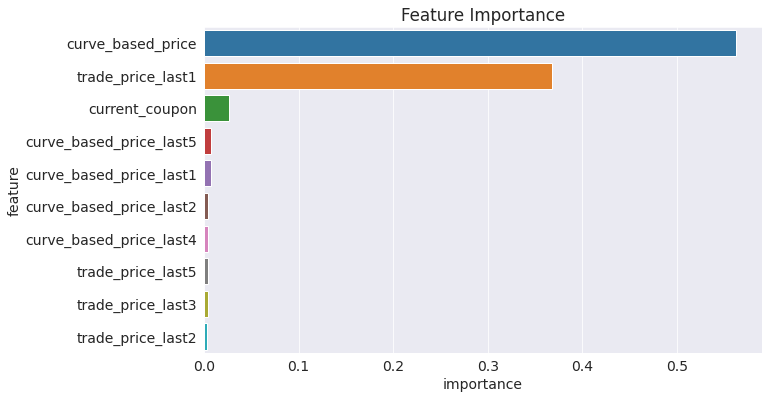

In [90]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=rf1_importance_df.head(10), x='importance', y='feature');

##3rd Model - Gradient Boosting Machine

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model. 

For a mathematical explanation of gradient boosting, check out the following resources:

- [XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)
- [Video Tutorials on StatQuest](https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6)

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)

### Training

To train a GBM, we can use the `XGBRegressor` class from the [`XGBoost`](https://xgboost.readthedocs.io/en/latest/) library.

In [91]:
from xgboost import XGBRegressor

In [ ]:
XGB_Model = XGBRegressor(random_state=42, n_jobs=-1).fit(train, train_target1)

###Make Predictions & Evaluate Model

We can now make predictions and evaluate the model using `XGB_Model.predict` and let's evaluate the predictions using RMSE error.

In [ ]:
XGB_train_preds = XGB_Model.predict(train)

In [ ]:
XGB_train_rmse = np.sqrt(mean_squared_error(train_target1, XGB_train_preds))

In [ ]:
print('The RMSE loss for the training set is $ {}.'.format(XGB_train_rmse))

The RMSE loss for the training set is $ 0.5604039626397497.


In [ ]:
XGB_val_preds = XGB_Model.predict(val)

In [ ]:
XGB_val_rmse = np.sqrt(mean_squared_error(val_target1, XGB_val_preds))

In [ ]:
print('The RMSE loss for the validation set is $ {}.'.format(XGB_val_rmse))

The RMSE loss for the validation set is $ 1.7387145251153426.


In [ ]:
XGB_test_preds = XGB_Model.predict(test)
XGB_test_preds

array([ 97.86084 , 116.187645, 104.60958 , ..., 100.4563  ,  83.86931 ,
        94.383995], dtype=float32)

### Hyperparameter Tuning and Regularization

Just like other machine learning models, there are several hyperparameters we can to adjust the capacity of model and reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Check out the following resources to learn more about hyperparameter supported by XGBoost:

- https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor
- https://xgboost.readthedocs.io/en/latest/parameter.html

In [ ]:
def test_params_xgb(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train, train_target1)
    train_rmse = mean_squared_error(model.predict(train), train_target1, squared=False)
    val_rmse = mean_squared_error(model.predict(val), val_target1, squared=False)
    return train_rmse, val_rmse

In [ ]:
test_params_xgb(n_estimators=40)

(0.688552727888422, 1.67583582981977)

In [ ]:
test_params_xgb(max_depth=5)

(0.644499225873286, 1.7036887359513408)

In [ ]:
test_params_xgb(n_estimators=40, learning_rate=0.3)

(0.688552727888422, 1.67583582981977)

### Visualization

We can visualize individual trees using `plot_tree` (note: this requires the `graphviz` library to be installed).

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

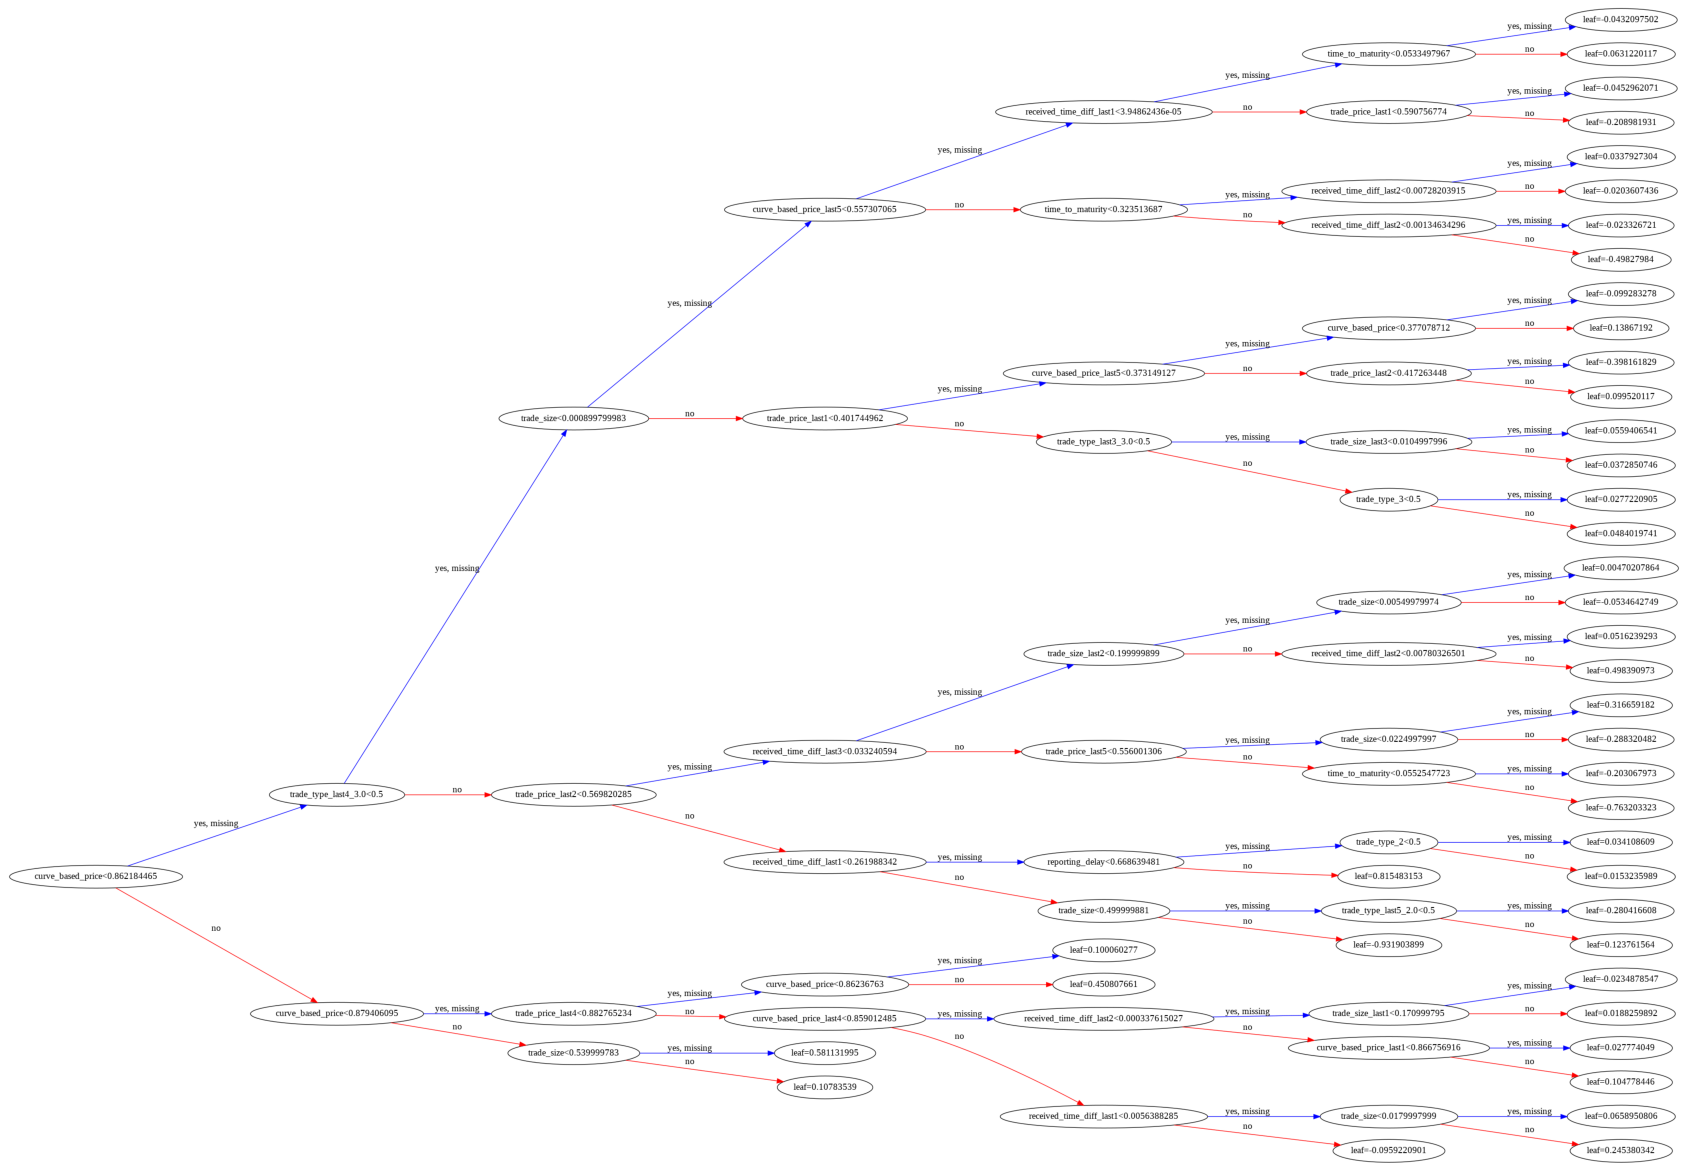

In [ ]:
plot_tree(XGB_Model, rankdir='LR', num_trees=19);

Notice how the trees only compute residuals, and not the actual target value. We can also visualize the tree as text.

In [ ]:
trees = XGB_Model.get_booster().get_dump()

In [ ]:
len(trees)

100

In [ ]:
print(trees[19])

0:[curve_based_price<0.862184465] yes=1,no=2,missing=1
	1:[trade_type_last4_3.0<0.5] yes=3,no=4,missing=3
		3:[trade_size<0.000899799983] yes=7,no=8,missing=7
			7:[curve_based_price_last5<0.557307065] yes=15,no=16,missing=15
				15:[received_time_diff_last1<3.94862436e-05] yes=27,no=28,missing=27
					27:[time_to_maturity<0.0533497967] yes=47,no=48,missing=47
						47:leaf=-0.0432097502
						48:leaf=0.0631220117
					28:[trade_price_last1<0.590756774] yes=49,no=50,missing=49
						49:leaf=-0.0452962071
						50:leaf=-0.208981931
				16:[time_to_maturity<0.323513687] yes=29,no=30,missing=29
					29:[received_time_diff_last2<0.00728203915] yes=51,no=52,missing=51
						51:leaf=0.0337927304
						52:leaf=-0.0203607436
					30:[received_time_diff_last2<0.00134634296] yes=53,no=54,missing=53
						53:leaf=-0.023326721
						54:leaf=-0.49827984
			8:[trade_price_last1<0.401744962] yes=17,no=18,missing=17
				17:[curve_based_price_last5<0.373149127] yes=31,no=32,missing=31
					31:[curve_ba

### Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [ ]:
XGB_importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': XGB_Model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
XGB_importance_df.head(10)

feature  importance
4         curve_based_price    0.504287
6         trade_price_last1    0.336577
0            current_coupon    0.055410
10        trade_price_last2    0.041930
18        trade_price_last4    0.020785
14        trade_price_last3    0.006141
8   curve_based_price_last1    0.006001
20  curve_based_price_last4    0.005746
16  curve_based_price_last3    0.003421
28             trade_type_3    0.002667

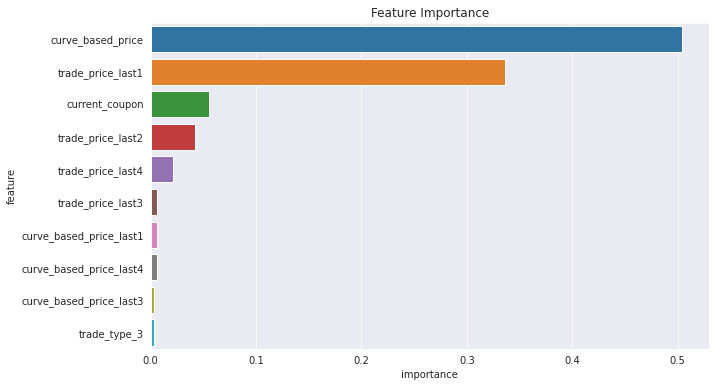

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=XGB_importance_df.head(10), x='importance', y='feature');

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk. 

In [ ]:
import joblib

In [ ]:
bond_price_prediction = {
    'ridge_model': model,
    'rf_model' : rf1,
    'XGB_Model' : XGB_Model,
    'imputer' : imputer,
    'scaler' : scaler,
    'encoder' : encoder,
    'train_inputs' : X_train,
    'train_target': train_target1,
    'val_input' : X_val,
    'val_target' : val_target1,
    'test_inputs' : test_inputs,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(bond_price_prediction, 'bond-price-prediction-with-scikit-learn.joblib')

['bond-price-prediction-with-scikit-learn.joblib']

##Summary and References

**Future Work**


*   We found out that the ridge regression model is the best model for the lowest RMSE compared to random forest model and Gradient Boosting model.
*   We can further use other machine learning models like support vector machines and nueral networks as those methods are more optimal at decreasing RMSE and predict more accurate bond prices.



**Summary**

The following topics were covered in this note book:

1.   Downloading a real-world dataset from Kaggle

1.   Exploratory data analysis and visualization

1.   Splitting a dataset into training, validation & test sets

1.   Filling/imputing missing values in numeric columns

1.   Scaling numeric features to a (0,1)range

1.   Encoding categorical columns as one-hot vectors

1.   Training a Linear regression Model using Scikit-learn

2.   Evaluating a model using a validation set and test set

2.   Overfitting, hyperparameter tuning & regularization for linear repression 

2.   Training and interpreting random forests Model

2.   Overfitting, hyperparameter tuning & regularization for random forests 
model

2.   Training and interpreting a gradient boosting model using XGBoost

2.   Configuring the gradient boosting model and tuning hyperparamters

2.   Creating a training and test set for reporting results

**References**

**Check out these resources to learn more:**

*   https://www.kaggle.com/hely333/eda-regression

*   https://www.youtube.com/watch?v=kHwlB_j7Hkc

*   https://scikit-learn.org/stable/modules/tree.html

*   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
*   https://albertum.medium.com/l1-l2-regularization-in-xgboost-regression-7b2db08a59e0


*   https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/


*   https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor


*   https://xgboost.readthedocs.io/en/latest/parameter.html






